## Cookbook: TREEMIX

In [1]:
## conda install -c ipyrad ipyrad
## conda install -c ipyrad treemix
## conda install -c eaton-lab toytree

In [2]:
import ipyrad.analysis as ipa
import toytree

### Define the populations

In [3]:
## a dictionary mapping sample names to 'species' names
imap = {
    "prz": ["32082_przewalskii", "33588_przewalskii"],
    "cys": ["41478_cyathophylloides", "41954_cyathophylloides"],
    "cya": ["30686_cyathophylla"],
    "sup": ["29154_superba"],
    "cup": ["33413_thamno"],
    "tha": ["30556_thamno"],
    "rck": ["35236_rex"],
    "rex": ["35855_rex", "40578_rex"],
    "lip": ["39618_rex", "38362_rex"],  
    }

## optional: loci will be filtered if they do not have data for at
## least N samples in each species. Minimums cannot be <1.
minmap = {
    "prz": 2,
    "cys": 2,
    "cya": 1,
    "sup": 1,
    "cup": 1,
    "tha": 1, 
    "rck": 1,
    "rex": 2,
    "lip": 2,
    }

### Create a Treemix object


In [4]:
t = ipa.treemix(
    name="test",
    data="analysis-ipyrad/pedic-full_outfiles/pedic-full.snps.phy",
    imap=imap,
    minmap=minmap,
    )

In [13]:
## you can set additional parameter args here
t.params.m = 1
t.params.root = "prz"
t.params

binary      treemix             
bootstrap   0                   
climb       0                   
cormig      0                   
g           (None, None)        
k           0                   
m           1                   
noss        0                   
root        prz                 

### Generate the treemix input file

In [15]:
## write treemix input files so you can call treemix from the command line
t.write_output_file()

ntaxa 13; nSNPs 14159


### The command string
This shows the command string that corresponds to the parameter settings in the Treemix object. You can see that the input file (-i) is the string we enetered in the data field above, and the output prefix (-o) corresponds to the default working directory and the name field that we provided above. In addition, the argument (-m 1) is added because we added that to the params dictionary. 

In [14]:
## the command string
print t.command

treemix -i /home/deren/Documents/ipyrad/tests/analysis-treemix/test.treemix.in.gz -o /home/deren/Documents/ipyrad/tests/analysis-treemix/test -m 1 -root prz


In [40]:
## you can run the command in a notebook by using bash one-liners (!)
! $t.command > analysis-treemix/treemix.log

### Run treemix jobs
Alternatively, you can use the `.run()` command of the treemix object to run treemix. This is more convenient because the results will automatically be parsed by the treemix object so that they are easily accessible for downstream analyses. In the loop below we run treemix over a range of migration parameters (-m) and with 5 replicates per setting. 

In [18]:
## a dictionary for storing treemix objects
tdict = {}

## iterate over values of m
for rep in range(5):
    for mig in range(4):
        
        ## create new treemix object copy
        name = "mig-{}-rep-{}".format(mig, rep)
        tmp = t.copy(name)

        ## set params on new object
        tmp.params.m = mig
    
        ## run treemix analysis
        tmp.run()
        
        ## store the treemix object
        tdict[name] = tmp

ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159
ntaxa 13; nSNPs 14159


### Accessible results

In [48]:
## choose a treemix object from the above analysis
t = tdict['mig-1-rep-1']

In [49]:
## access output files produced by treemix
t.files

cov        ~/Documents/ipyrad/tests/analysis-treemix/mig-1-rep-1.cov.gz
covse      ~/Documents/ipyrad/tests/analysis-treemix/mig-1-rep-1.covse.gz
edges      ~/Documents/ipyrad/tests/analysis-treemix/mig-1-rep-1.edges.gz
llik       ~/Documents/ipyrad/tests/analysis-treemix/mig-1-rep-1.llik
modelcov   ~/Documents/ipyrad/tests/analysis-treemix/mig-1-rep-1.modelcov.gz
treeout    ~/Documents/ipyrad/tests/analysis-treemix/mig-1-rep-1.treeout.gz
vertices   ~/Documents/ipyrad/tests/analysis-treemix/mig-1-rep-1.vertices.gz

In [53]:
## access the newick string representation of the tree
t.tree

'(prz:0.149605,((cys:0.0658729,(sup:0.0469524,cya:0.0465192):0.0142848):0.0161413,((rck:0.0350305,(rex:0.0163992,(lip:0.035097,tha:0.0774215):0.00106769):0.000938287):0.00626791,cup:0.0434979):0.0338857):0.149605);'

In [294]:
## access a list of admixture edges
t.admixture

[('cup:0.0434979', 'tha:0.0774215', '0.247172')]

### For now, go plot the results in R
Follow the directions in the Treemix tutorial for plotting results.

### View results in Toytree
*Coming soon*, the code to produce tree plots with admixture edges in Toytree is still in development. 

In [283]:
import toyplot
import toytree

In [284]:
## select a result
tmp = tdict["mig-1-rep-1"]

In [292]:
## create a toytree object from the treemix tree result
tre = toytree.tree(newick=tmp.tree)

## draw the tree similar to the Treemix plotting R code
canvas = toyplot.Canvas(width=325, height=300)
axes = canvas.cartesian(padding=25, margin=75)
tre.draw(
    axes=axes,
    use_edge_lengths=True,
    tree_style='c',
    tip_labels_align=True,
    #admixture=tmp.admixture,
);

## add scale bar for edge lengths
axes.y.show=False
axes.x.ticks.show=True
axes.x.label.text = "Drift parameter"

prz cys sup cya cup rck rex lip tha -0.3 -0.2 -0.1 0.0 Drift parameter

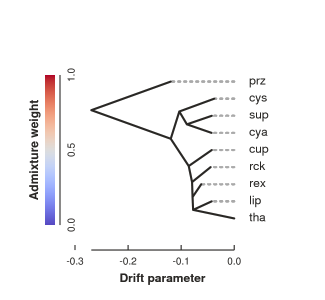

In [293]:
## add scale bar for admix magnitudes
if tmp.admixture:
    colormap = toyplot.color.diverging.map("BlueRed", 0, 1)
    ax2 = canvas.color_scale(
        colormap, 
        x1=50, y1=-75, x2=50, y2=75,
        width=10,
    )
    ax2.axis.label.text = "Admixture weight"
    ax2.axis.label.location = 'above'
    
## show
canvas

In [23]:
##
## 
## tt.files = dict of treemix outputs filehandles
## tt.tree = string of the tree pulled from line 0 of treeout.gz
## tt.admixture = list of admix events (nidx, nidx, dist, dist, weight)
## 
##

In [12]:
## get nodes involved in admix path
parent = 'cys,(cya,sup)'
child = 'cup'

## get vectors between those nodes and their parents
## and store points along vectors at pdist and cdist
## no, this will be done by draw();

## store info in a list
admixture=[
    (parent, child, pdist, cdist, weight),
]

NameError: name 'pdist' is not defined